In [ ]:
#web scraping: se trata de cojer datos de una pag web para ello usaremos dos libnrerias
#beautifulsoap + requests
#> pip install beautifulsoup4
#para forzar el python es  >py -3.13 -m pip install beautifulsoup4
#>pip install requests
import requests 
from bs4 import BeautifulSoup
import sys #Libreria de sistema

url = "https://www.elperiodico.com/es/"
url2 = "https://www.lavanguardia.com/"
url3 = "https://www.infojobs.net/"

#definir headers para evitar bloqueos, de esta version para adelante
headers = {
    "User-Agent": "Mozilla/100.0 Chrome/120.0.0.0 Safari/537.36"
}
#control de errores Try: 
try:
    response = requests.get(url2, headers=headers)
except requests.exceptions.RequestException as e: #la e representa el error
    print("se ha producido el error", e)
    #salgo con el codigo de error
    sys.exit(1) # ese 1 te muestra el codigo del error impreso
#parcear el contenido html
soup = BeautifulSoup(response.text, "html.parser")
#buscamos las etiquetas h2
articulos = soup.find_all('h2')

iter = 1
for articulo in articulos:
    print(articulo.get_text(strip=True))
    print("************************")
    iter +=1
    print('numero de articulos',iter)
    

PRACTICA 34: VAMOS A SCRAPEAR LA WEB DE "EL PAIS", QUEREMOS GUARDAR EN UN DATAFRAME LOS PRIMEROS 10 ARTICULOS DE LA PAG PRINCIPAL.


In [ ]:
import requests 
from bs4 import BeautifulSoup
import sys
import pandas as pd

headers = {
    "User-Agent": "Mozilla/100.0 Chrome/120.0.0.0 Safari/537.36"
}

url4 = "https://elpais.com/"

try:
    response = requests.get(url4, headers=headers)
except requests.exceptions.RequestException as e: 
    print("se ha producido el error", e)
    sys.exit(1)

soup = BeautifulSoup(response.text, "html.parser")
articulos = soup.find_all('h2')

#primero lista en blanco
lista_articulos = []

iter = 1
for articulo in articulos:
    texto = articulo.get_text(strip=True)
    lista_articulos.append(texto)
    if iter >= 10:
        break
    iter +=1
#crear el dataframe
df = pd.DataFrame(lista_articulos, columns=['Articulos'])
df




In [ ]:
import requests 
from bs4 import BeautifulSoup

url = "https://books.toscrape.com/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

libros = soup.find_all('article', class_='product_pod')

for libro in libros: 
    print(libro.h3.a['title']) #el titulo del libro
    print(libro.find('p',class_="price_color").text)
    print(libro.find('p',class_="star-rating")['class'][1])

PRACTICA 35: VAMOS A SCRAPEAR LA WEB DE LIBROS BOOKS.TOPSCRAPE.COM Y GUARDAREMOS EN UN FICHERO DE EXCEL LOS TITULOS DE LOS LIBROS MAS EL PRECIO DE LA PRIMERA PAGINA DE LA CATEGORIA "FICTION" Y DE LA CATEGORIA "TRAVEL"
PODRIA SER DE LAS 3 PRIMERAS PAGINAS DE CADA CATEGORIA


In [ ]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

datos = []

url = "https://books.toscrape.com/catalogue/category/books/travel_2/index.html"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

libros = soup.find_all('article', class_='product_pod')

for libro in libros: 
    titulo = libro.h3.a['title'] #el titulo del libro
    precio = libro.find('p',class_="price_color").text
    datos.append({'Titulo':titulo, 'Precio': precio})
   

url = "https://books.toscrape.com/catalogue/category/books/fiction_10/index.html"

response = requests.get(url2)
soup = BeautifulSoup(response.text, 'html.parser')

libros = soup.find_all('article', class_='product_pod')

for libro in libros: 
    titulo = libro.h3.a['title'] #el titulo del libro
    precio = libro.find('p',class_="price_color").text
    datos.append({'Titulo':titulo, 'Precio': precio})

df = pd.DataFrame(datos)
df.to_excel(r"C:\temp\libros.xlsx", sheet_name="Libros")
print("terminado")

In [ ]:
#cargar excel en dataframe
import pandas as pd
pedidos = pd.read_excel(r"C:\Users\formacio\Desktop\clases python\Datos Pedidos.xlsx", sheet_name="Datos")
pedidos                        

pedidos_comercial = pedidos.groupby("Comercial").Importe.sum()
pedidos_comercial = pd.DataFrame(pedidos_comercial).reset_index()
pedidos_comercial

#instalar la libreria de graficos matplotlib
#> pip install matplotlib
import matplotlib.pyplot as plt
#1) tenemos que reservar espacio en el kernell para hacer la figura
plt.figure(figsize=(6,5))
#2) el grafico que haremos de columnas es tipo'bar'
pedidos_comercial.plot(kind='bar',x='Comercial',y='Importe', color='gold')
#formato como el titulo
plt.title("Importe por Comercial")
plt.xlabel("Comerciales")
plt.ylabel("Importe")
#rotar los nombres de x
plt.xticks(rotation= 45)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

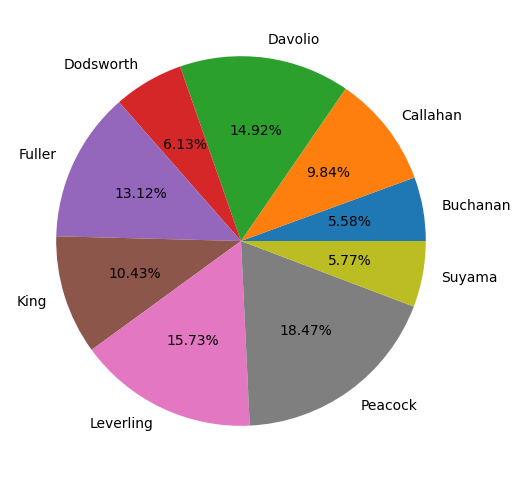

In [91]:
#el circular que sera el kind pie
plt.figure(figsize=(6,6))
plt.pie(pedidos_comercial['Importe'],labels=pedidos_comercial['Comercial'], autopct='%.2f%%') #el 2 indica cuantos decimales queres ver
plt.show


In [90]:
#grafico de lineas en orden crnologico para ver evolucion en el tiempo
pedidos['Fecha de Pedido'] = pd.to_datetime(pedidos['Fecha de Pedido'])
#el accesor para ver el mes
pedidos['Mes'] = pedidos['Fecha de Pedido'].dt.month

pedidos['Año'] = pedidos['Fecha de Pedido'].dt.year

pedidos['Dia'] = pedidos['Fecha de Pedido'].dt.day

pedidos['Mes Letras1'] = pedidos['Fecha de Pedido'].dt.month_name()

pedidos['Mes Letras2'] = pedidos['Fecha de Pedido'].dt.strftime('%B')




In [93]:
meses_pedidos = pedidos.groupby('Mes Letras2').Importe.sum()
meses_pedidos = pd.DataFrame(meses_pedidos).reset_index()
meses_pedidos
#vamos a hacer una lista de los meses en orden
orden_meses = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
meses_pedidos['Mes Letras2']=pd.Categorical(meses_pedidos['Mes Letras2'],categories=orden_meses, ordered=True)
meses_pedidos = meses_pedidos.sort_values("Mes Letras2")
meses_pedidos

,Mes Letras2,Importe
4,January,167547.52
3,February,145769.15
7,March,149805.35
0,April,190329.95
8,May,76722.36
6,June,39088.00
5,July,85657.03
1,August,76591.09
11,September,87369.02
10,October,111532.10


<Figure size 1200x500 with 0 Axes>

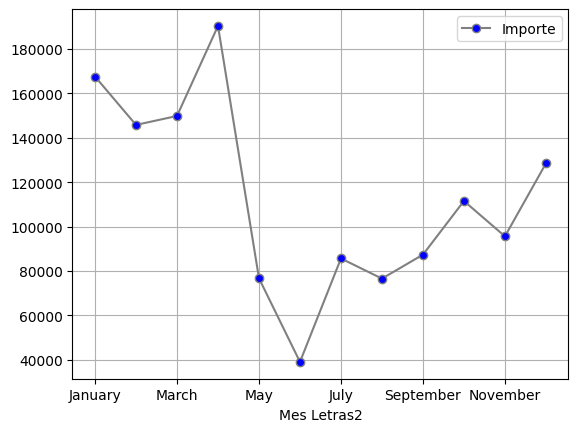

In [96]:
plt.figure(figsize=(12,5))
meses_pedidos.plot(kind='line',x='Mes Letras2', marker='o', markerfacecolor='blue', color = 'grey')
plt.grid(True)
plt.show()